In [98]:
import TraitData
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from permutation_analysis import Permutation
from sklearn.preprocessing import scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame, Series

# Feature Importance Analysis for Random Forests

## Data

In [76]:
responseVar = "migration_m"

drop_features = ["Taxon",
                 "migr_sterr_m", 
                 "shift + 2SE", 
                 'signif_shift',
                 "signif_shift2",
                 "dispmode01",
                 "DispModeEng", ## what is this
                 "shift + 2SE"
                ]

categorical_features = ["oceanity",
                        "dispersal_mode",
                        "BreedSysCode",
                        "Grime"]

td = TraitData.TraitData("../data/plants5.csv",
               responseVar,
               drop_features,
               categorical_features,
               dropNA=1)

X, x_test, Y, y_test = td.train_test_split(0.30)
print(td.feature_names)

Index(['Bio1_mean_nosyn', 'Bio1_std_nosyn', 'Bio1_var_nosyn',
       'Bio1_mean_inclsyn', 'Bio1_std_inclsyn', 'Bio1_var_inclsyn',
       'oceanity_ks', 'oceanity_o', 'oceanity_os', 'oceanity_sks',
       'oceanity_so', 'oceanity_sos', 'dispersal_mode_animal',
       'dispersal_mode_gravity', 'dispersal_mode_water', 'dispersal_mode_wind',
       'BreedSysCode_1.0', 'BreedSysCode_2.0', 'BreedSysCode_3.0',
       'BreedSysCode_4.0', 'Grime_c', 'Grime_cs', 'Grime_csr', 'Grime_r',
       'Grime_s', 'Grime_sr'],
      dtype='object')


## Regression

In [89]:
rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(scale(X), Y)

importances_std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)

importances_ind = np.argsort(rfr.feature_importances_)[::-1]

print(td.feature_names[importances_ind])

Index(['Bio1_mean_nosyn', 'Bio1_mean_inclsyn', 'Bio1_std_inclsyn',
       'Bio1_var_inclsyn', 'Bio1_std_nosyn', 'Bio1_var_nosyn',
       'BreedSysCode_1.0', 'oceanity_os', 'oceanity_so', 'BreedSysCode_2.0',
       'BreedSysCode_4.0', 'Grime_s', 'dispersal_mode_wind', 'Grime_csr',
       'dispersal_mode_gravity', 'Grime_c', 'BreedSysCode_3.0', 'oceanity_o',
       'Grime_cs', 'dispersal_mode_animal', 'oceanity_sks', 'oceanity_sos',
       'oceanity_ks', 'dispersal_mode_water', 'Grime_sr', 'Grime_r'],
      dtype='object')


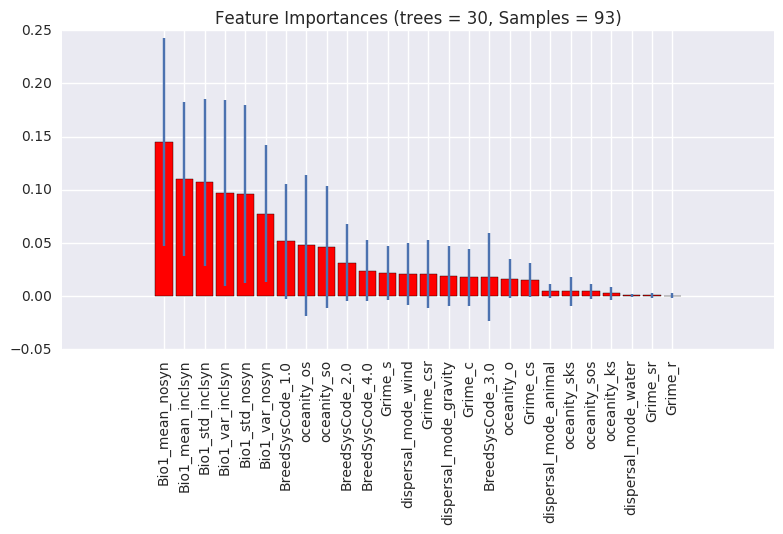

In [92]:
f, ax = plt.subplots()
bar_indices = np.arange(X.shape[1])
bar_width = 0.85

plt.title("Feature Importances (trees = {}, Samples = {})".format(rfr.get_params()["n_estimators"], len(X)))
plt.bar(bar_indices,
        rfr.feature_importances_[importances_ind],
        bar_width,
        color='r',
        yerr=importances_std[importances_ind],
        align='center', bottom=0)

plt.xticks(bar_indices, td.feature_names[importances_ind], rotation=90)
plt.tight_layout()
plt.show()

In [93]:
cross_val_score(rfr, scale(X), Y, cv=KFold(5), scoring="neg_mean_squared_error").mean()

-28.530438453541262

In [118]:
imp = DataFrame(columns=td.feature_names)
[DataFrame(x.feature_importances_.T, columns=td.feature_names) for x in rfr.estimators_]



ValueError: Shape of passed values is (1, 26), indices imply (26, 26)